<a href="https://colab.research.google.com/github/Prajwal-Luitel/Heart-Failure-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libary

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Remove warning after completion
# import warnings
# warnings.filterwarnings('ignore')

# Importing the Dataset
### Link: https://huggingface.co/datasets/aai530-group6/heart-failure-prediction-dataset

In [39]:
df = pd.read_csv("hf://datasets/aai530-group6/heart-failure-prediction-dataset/heart.csv")

In [40]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis (EDA)

In [41]:
categorical_columns =  df.select_dtypes(include=['object']).columns.to_list()+['FastingBS', 'HeartDisease'] # Concatening the list
numerical_columns = df.drop(columns=['FastingBS', 'HeartDisease']).select_dtypes(exclude=['object']).columns.to_list()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Correlation Heatmap

<Axes: >

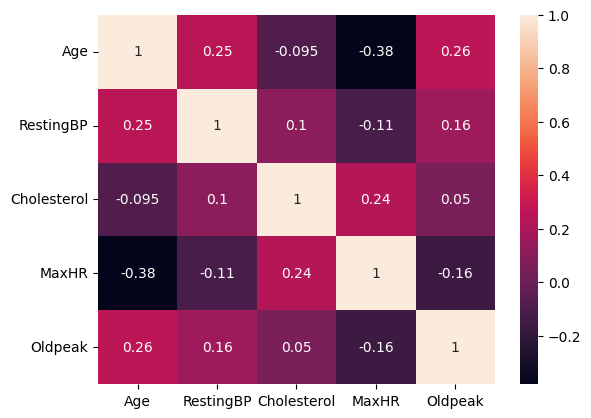

In [43]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

In [44]:
# Histogram and box plot
# n = len(numerical_columns)
# fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 15))

# for i in range(n):
#     sns.histplot(df[numerical_columns[i]], ax=axes[i,0], kde=True, label=numerical_columns[i])
#     sns.boxplot(df[numerical_columns[i]], ax=axes[i,1], orient='h', label=numerical_columns[i])

# plt.tight_layout()
# plt.show()

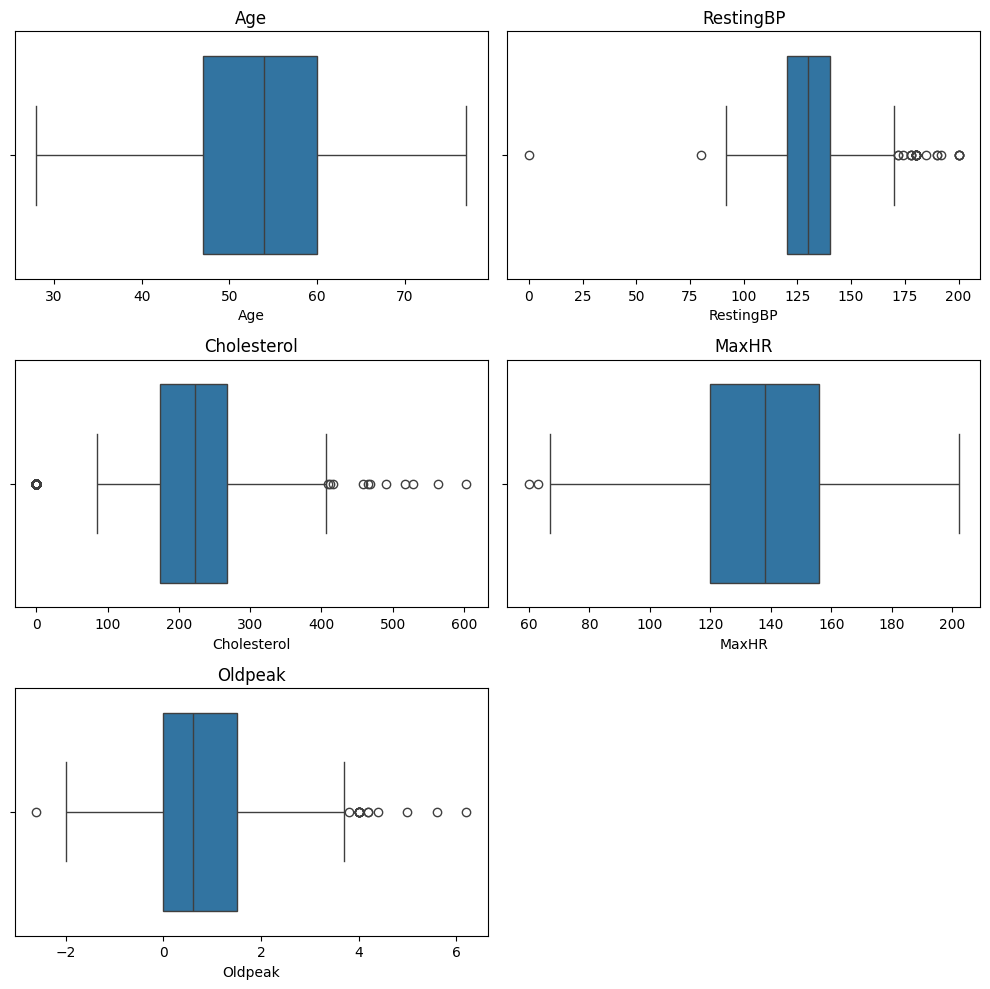

In [45]:
# Boxplot
n = len(numerical_columns)
plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[numerical_columns[i]], orient='h')
    plt.title(numerical_columns[i])
plt.tight_layout()
plt.show()

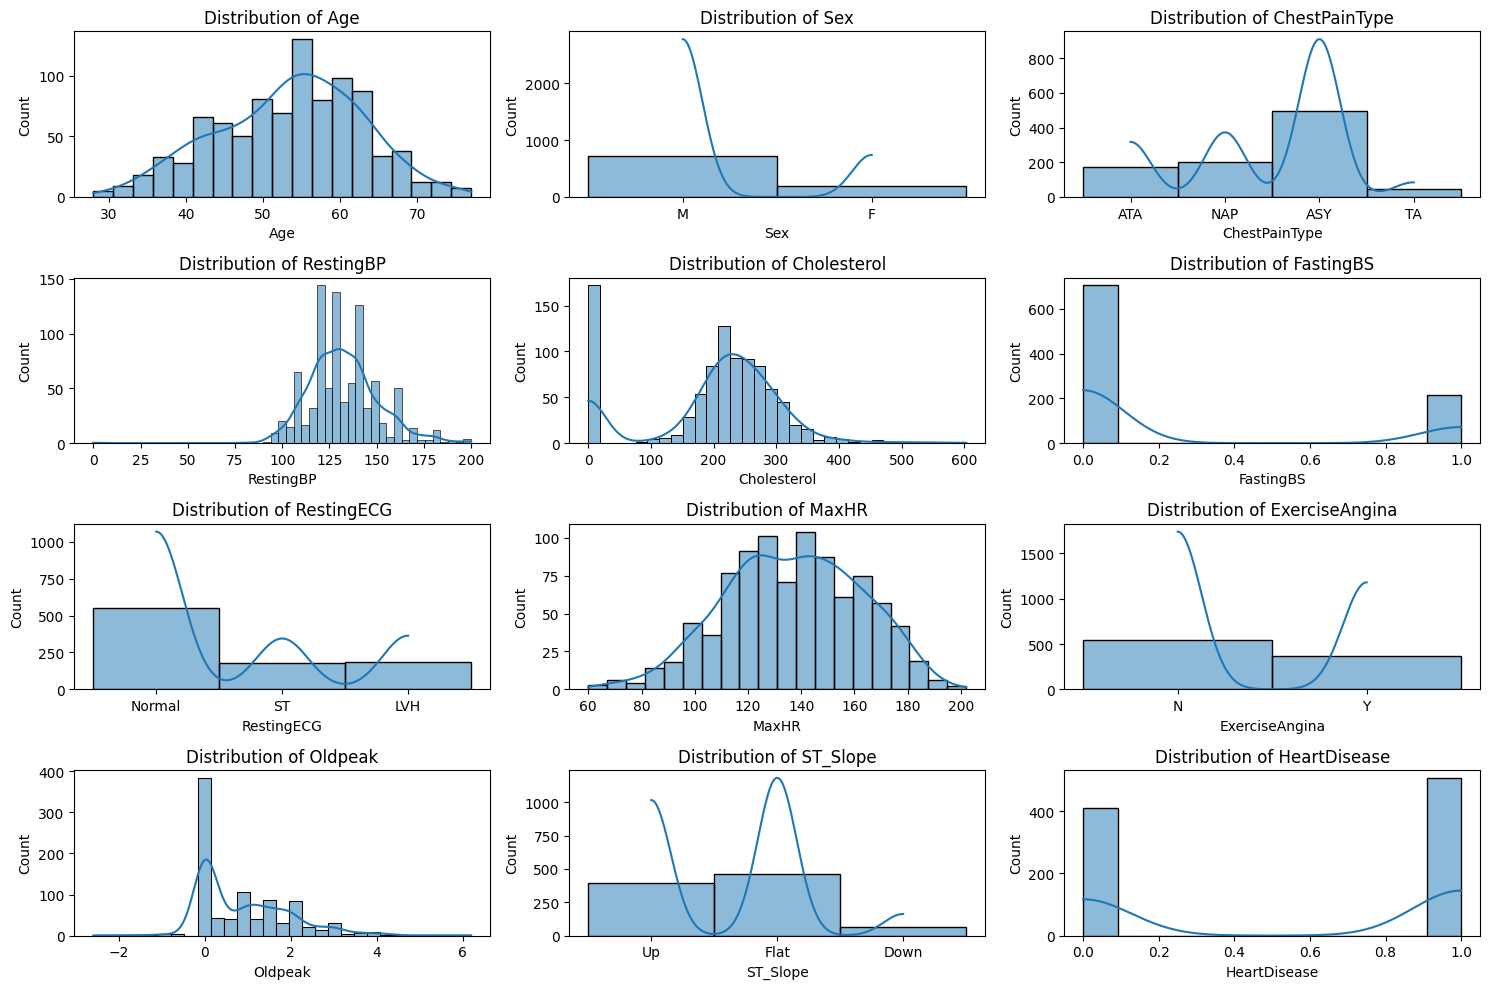

In [46]:
# Histogram
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

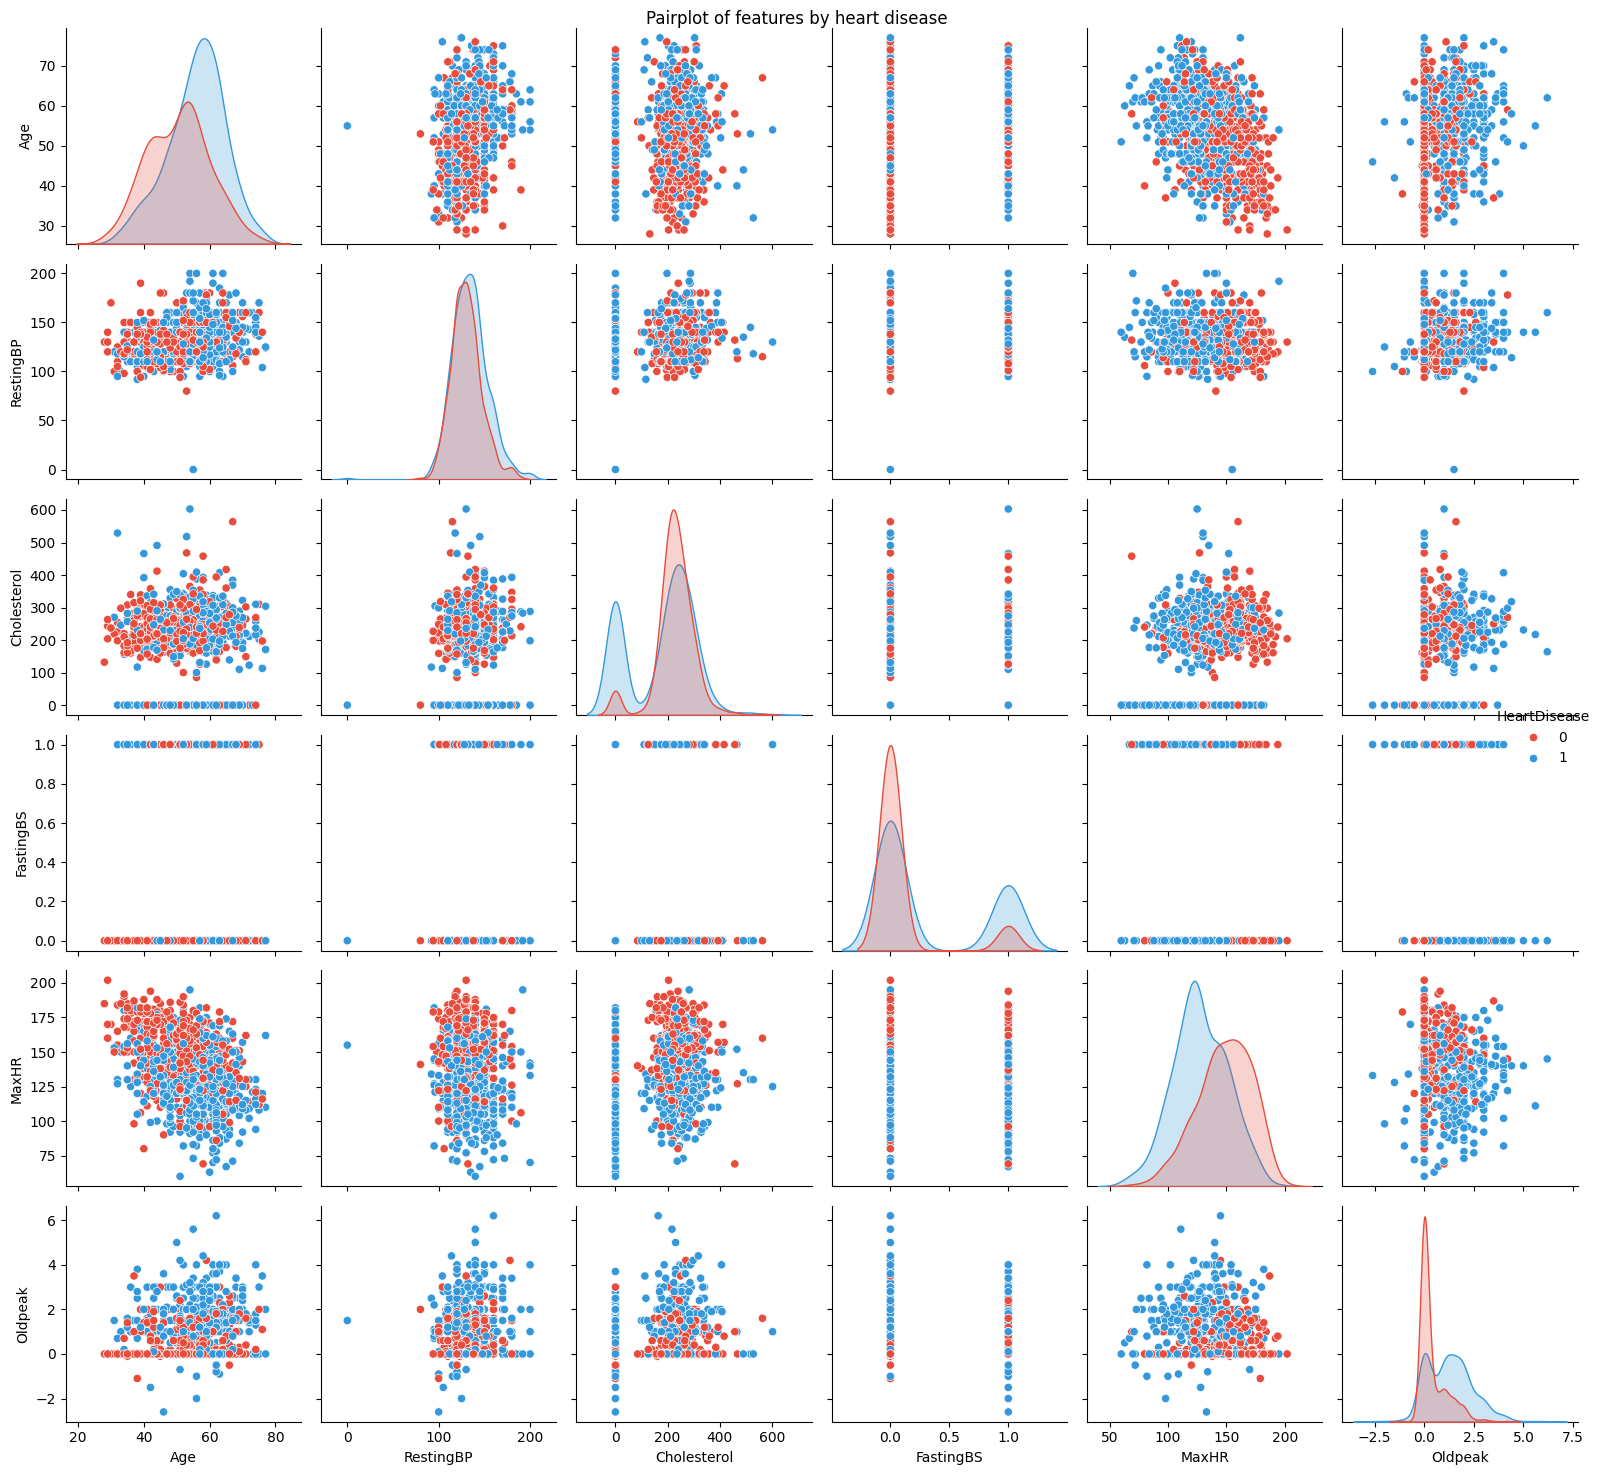

In [47]:
sns.pairplot(df,hue="HeartDisease", palette={0: "#e74c3c", 1: "#3498db"})
plt.suptitle("Pairplot of features by heart disease")
plt.tight_layout()
plt.show()

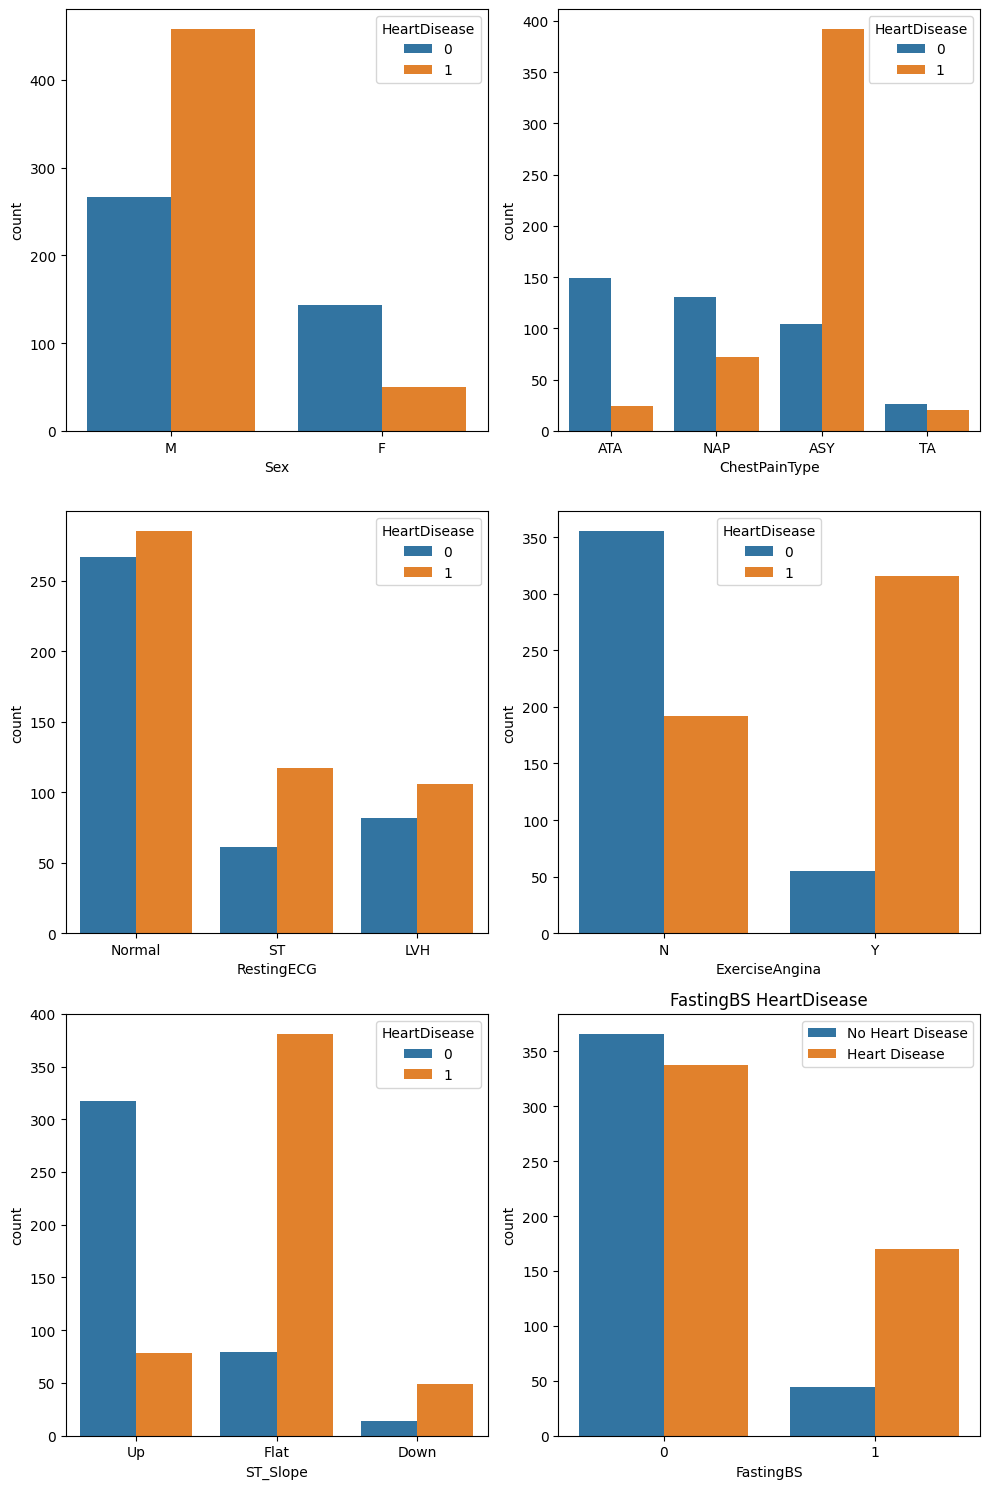

In [48]:
n = len(categorical_columns)
fig, axes = plt.subplots(nrows = int(np.floor(n / 2)), ncols = 2,figsize = (10,15))
for i in range(n-1):
    sns.countplot(data = df, x=categorical_columns[i] ,hue = "HeartDisease", ax=axes[int(i/2),i%2])
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(f"{categorical_columns[i]} HeartDisease")
plt.tight_layout()
plt.show()


# Feature Engineering

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [50]:
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}")

X_train shape: (688, 11)
X_test shape: (230, 11)


## One Hot Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first',dtype=np.int32)

In [52]:
encoded_train  = oe.fit_transform(X_train[categorical_columns[:-2]])
encoded_test  = oe.transform(X_test[categorical_columns[:-2]])

In [53]:
encoded_df_train = pd.DataFrame(encoded_train,
                                columns=oe.get_feature_names_out(categorical_columns[:-2]),
                                index = X_train.index )
encoded_df_test = pd.DataFrame(encoded_test,
                               columns=oe.get_feature_names_out(categorical_columns[:-2]),
                               index = X_test.index  )

In [54]:
print(f"encoded_df_train shape: {encoded_df_train.shape}\nencoded_df_train shape: {encoded_df_train.shape}")

encoded_df_train shape: (688, 9)
encoded_df_train shape: (688, 9)


In [55]:
X_train = pd.concat([X_train.drop(columns=categorical_columns[:-2]), encoded_df_train], axis=1)

X_test = pd.concat([X_test.drop(columns=categorical_columns[:-2]), encoded_df_test], axis=1)

In [56]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
637,43,115,303,0,181,1.2,1,0,0,0,1,0,0,1,0
541,76,104,113,0,120,3.5,1,0,1,0,0,0,0,0,0
570,56,128,223,0,119,2.0,1,0,0,0,0,1,1,0,0
611,62,135,139,0,137,0.2,1,0,0,1,0,1,0,0,1
685,61,120,260,0,140,3.6,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,63,100,0,1,109,-0.9,1,0,0,0,1,0,0,1,0
315,74,145,0,1,123,1.3,1,1,0,0,0,1,0,0,1
819,55,160,289,0,145,0.8,1,0,0,0,0,0,1,1,0
355,67,145,0,0,125,0.0,1,0,0,1,0,0,0,1,0


## Robust Scaler

In [57]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [58]:
X_train[numerical_columns] = robust_scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = robust_scaler.transform(X_test[numerical_columns])

In [59]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
637,-0.923077,-0.714286,0.887640,0,1.131579,0.466667,1,0,0,0,1,0,0,1,0
541,1.615385,-1.238095,-1.247191,0,-0.473684,2.000000,1,0,1,0,0,0,0,0,0
570,0.076923,-0.095238,-0.011236,0,-0.500000,1.000000,1,0,0,0,0,1,1,0,0
611,0.538462,0.238095,-0.955056,0,-0.026316,-0.200000,1,0,0,1,0,1,0,0,1
685,0.461538,-0.476190,0.404494,0,0.052632,2.066667,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.615385,-1.428571,-2.516854,1,-0.763158,-0.933333,1,0,0,0,1,0,0,1,0
315,1.461538,0.714286,-2.516854,1,-0.394737,0.533333,1,1,0,0,0,1,0,0,1
819,0.000000,1.428571,0.730337,0,0.184211,0.200000,1,0,0,0,0,0,1,1,0
355,0.923077,0.714286,-2.516854,0,-0.342105,-0.333333,1,0,0,1,0,0,0,1,0


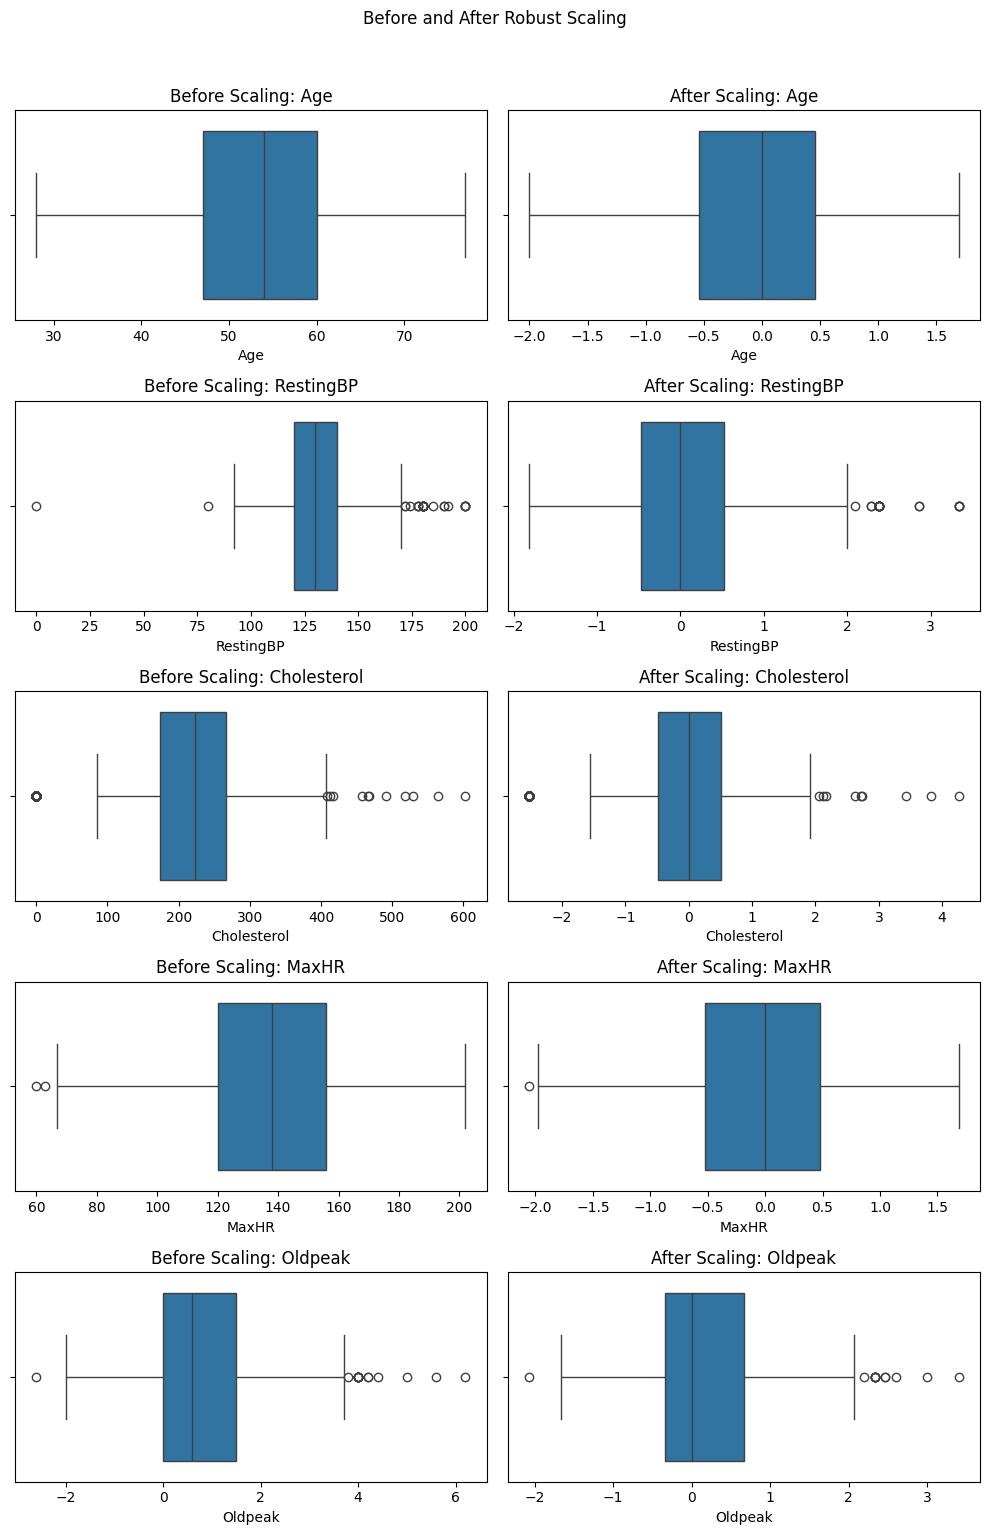

In [60]:
n = len(numerical_columns)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 15))

for i in range(n):
    sns.boxplot(df[numerical_columns[i]], ax=axes[i,0], orient='h')
    axes[i,0].set_title(f"Before Scaling: {numerical_columns[i]}")
    sns.boxplot(X_train[numerical_columns[i]], ax=axes[i,1], orient='h')
    axes[i,1].set_title(f"After Scaling: {numerical_columns[i]}")

plt.suptitle("Before and After Robust Scaling", y=1.02)
plt.tight_layout()
plt.show()

# Default Model

## Evaluation Function

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
  # Confusion Matrix
def display_confusion_matrix(y_train, y_pred, title=""):
  cm = confusion_matrix(y_train, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title(f"Confusion Matrix for {title}")
  plt.show()

def display_ROC(y_train, y_prob, title=""):
  fpr, tpr, thresholds = roc_curve(y_train, y_prob)
  roc_auc = roc_auc_score(y_train, y_prob)
  plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"ROC Curve for {title}")
  plt.legend()
  plt.show()

def generate_evaluation(y_train, y_pred, y_prob, title=""):
  print(classification_report(y_test, y_pred)+"\n")
  display_confusion_matrix(y_train, y_pred, title)
  display_ROC(y_train, y_prob, title)



## Logistic Regression

### Model Training

In [89]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Model Evaluation

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       103
           1       0.88      0.91      0.90       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230




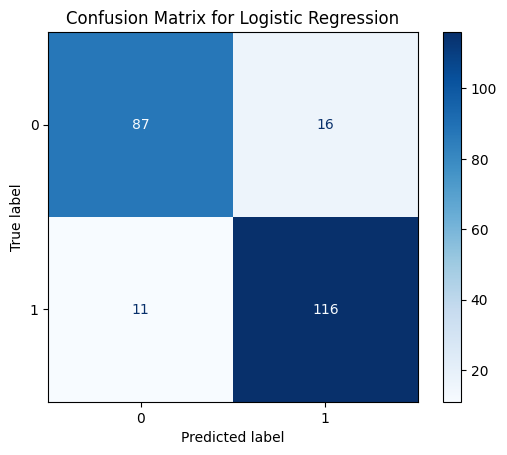

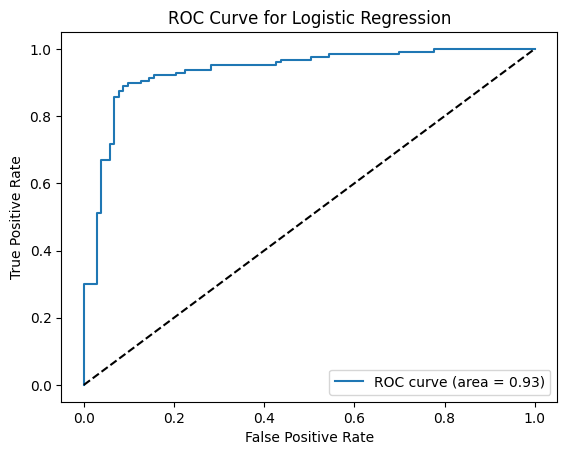

In [90]:
y_pred = logistic_regression.predict(X_test)
y_prob = logistic_regression.predict_proba(X_test)[:,1]
generate_evaluation(y_test, y_pred, y_prob, title="Logistic Regression")


## Decision Tree

### Model Training

In [91]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       103
           1       0.82      0.83      0.82       127

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230




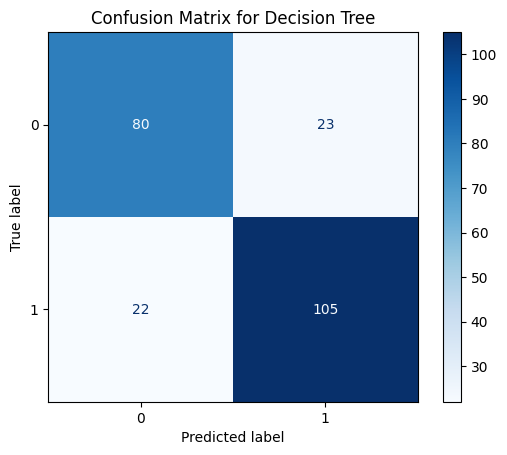

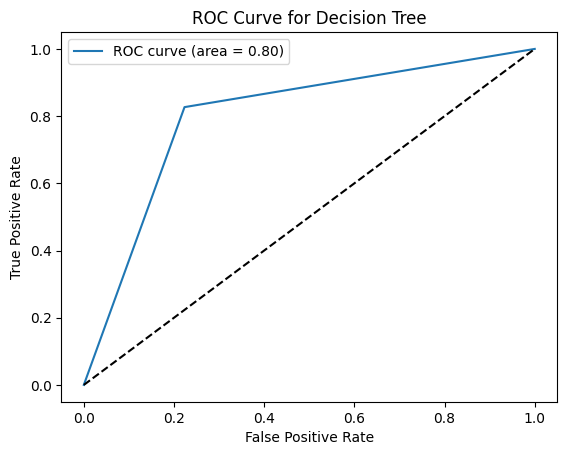

In [92]:
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:,1]
generate_evaluation(y_test, y_pred, y_prob, title="Decision Tree")

## XGBoost

### Model Training

In [93]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       103
           1       0.88      0.89      0.88       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230




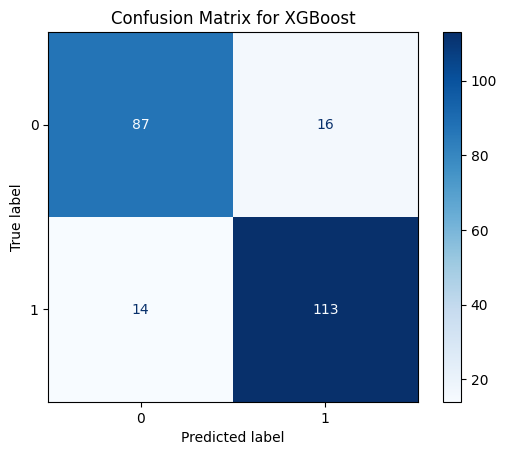

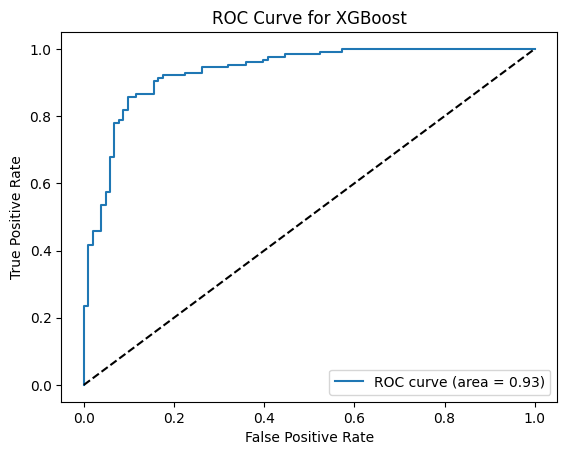

In [94]:
y_pred = xgboost.predict(X_test)
y_prob = xgboost.predict_proba(X_test)[:,1]
generate_evaluation(y_test, y_pred, y_prob, title="XGBoost")


# Hyperparameter Tunning

In [68]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression

### Model Tunning

In [69]:
param_grid = [
    {
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.2, 0.5, 0.8]
    }
]

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(estimator = lr,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)


In [70]:
lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.2, 0.5, 0.8],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             verbose=2)

In [71]:
lr_grid.best_params_

{'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}

In [72]:
lr_grid.best_score_

np.float64(0.8575478684015655)

### Model Training

In [95]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(**lr_grid.best_params_)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.1, l1_ratio=0.2, penalty='elasticnet', solver='saga')

### Model Evaluation

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       103
           1       0.87      0.93      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230




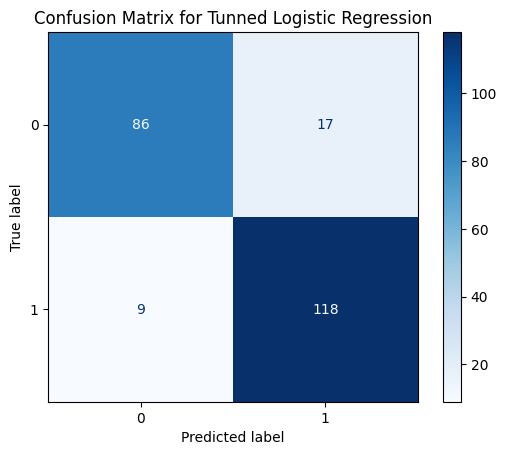

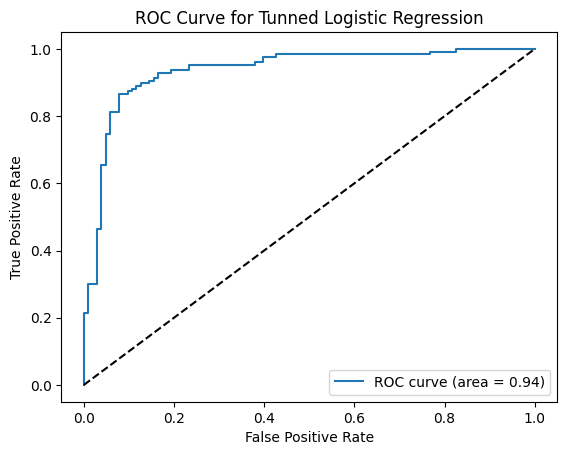

In [96]:
y_pred = logistic_regression.predict(X_test)
y_prob = logistic_regression.predict_proba(X_test)[:,1]
generate_evaluation(y_test, y_pred, y_prob, title="Tunned Logistic Regression")

## Decision Tree

### Model Tunning

In [75]:
param_grid = {
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [2, 3, 5, 10],
    'max_features': [None, 0.25, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

dt = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(estimator = dt,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)


In [76]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 30],
                         'max_features': [None, 0.25, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10]},
             verbose=2)

In [77]:
dt_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [78]:
dt_grid.best_score_

np.float64(0.8385803448640644)

### Model Training

In [97]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 42, **dt_grid.best_params_)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=10,
                       random_state=42)

### Model Evaluation

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       103
           1       0.87      0.82      0.84       127

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230




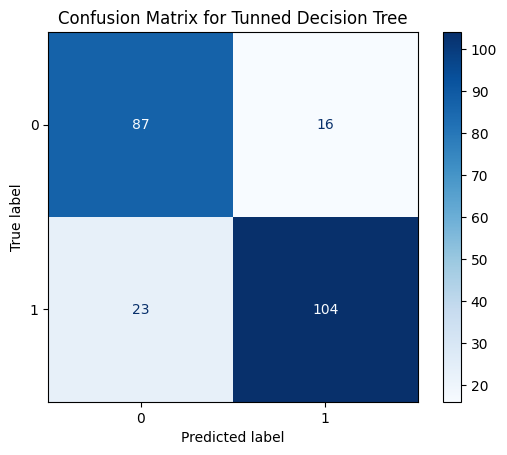

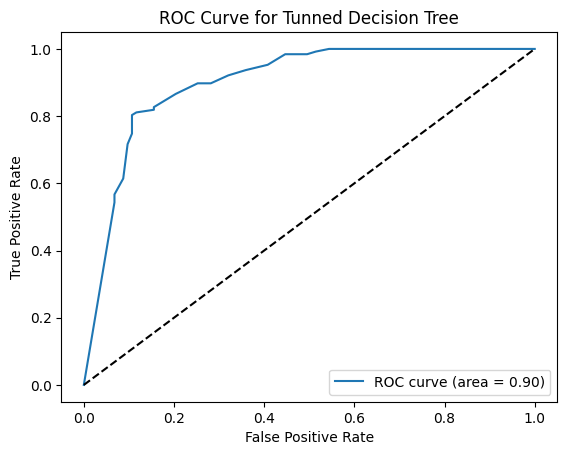

In [98]:
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:,1]
generate_evaluation(y_test, y_pred, y_prob, title="Tunned Decision Tree")

## XGBoost

### Model Tunning

In [81]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 2,  5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

xg = XGBClassifier(random_state=42)

xg_grid = GridSearchCV(estimator = xg,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)


In [82]:
xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 2, 5, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [83]:
xg_grid.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1.0}

In [84]:
xg_grid.best_score_

np.float64(0.8706336612715541)

### Model Training

In [99]:
xgboost = XGBClassifier(random_state=42, **xg_grid.best_params_)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       103
           1       0.90      0.91      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230




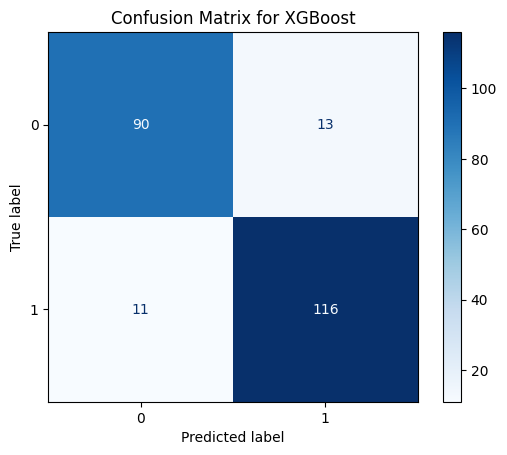

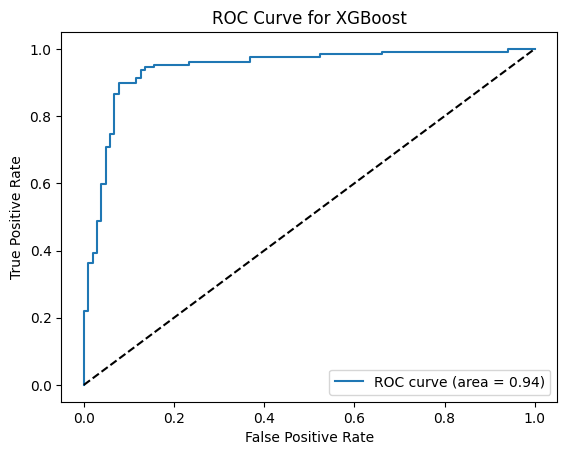

In [100]:
y_pred = xgboost.predict(X_test)
y_prob = xgboost.predict_proba(X_test)[:,1]
generate_evaluation(y_test, y_pred, y_prob, title="XGBoost")